In [1]:
import matplotlib.pyplot as plt

Heat Capacities
===============
Determine the temperature dependence of 
the ideal gas heat capacity for water, $C_\mathrm{p}^\mathrm{IG}$

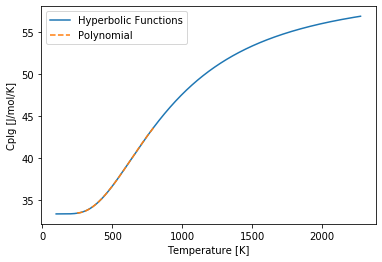

In [2]:
from scithermo.cp_ig import CpIdealGas
I = CpIdealGas(compound_name='Water', T_min_fit=250., T_max_fit=800., poly_order=3)
I.plot()
plt.show()

Equations of State
==================

Compare popular options
-----------------------

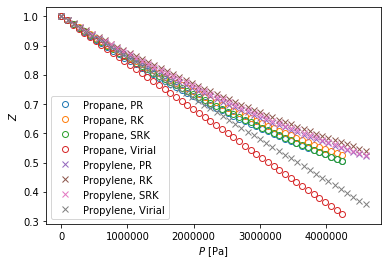

In [3]:

from scithermo.eos.cubic import PengRobinson, RedlichKwong, SoaveRedlichKwong
from scithermo.eos.virial import SecondVirial
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$P$ [Pa]')
ax.set_ylabel('$Z$')
for cmpd, marker in zip(['Propane', 'Propylene'], ['o', 'x']):
    for cls, name in zip([PengRobinson, RedlichKwong, SoaveRedlichKwong, SecondVirial], ['PR', 'RK', 'SRK', 'Virial']):
        I = cls(compound_name=cmpd)
        I.plot_Z_vs_P(300., 1e3, I.P_c, ax=ax, marker=marker, label='%s, %s' % (cmpd, name))
ax.legend()
plt.show()


Residual Properties
-------------------

($M^\mathrm{R} = M - M^\mathrm{IG}$)

Example: THF/Water at 0.1 MPa and 300 K


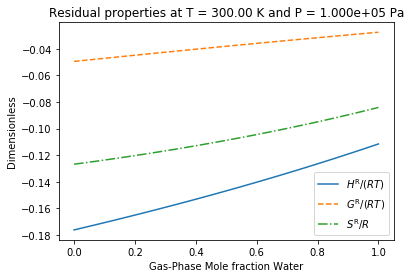

In [4]:
from scithermo.eos.virial import BinarySecondVirial
P, T = 1e5, 300.
mixture = BinarySecondVirial(
    i_kwargs={'compound_name': 'Water'},
    j_kwargs={'compound_name': 'Tetrahydrofuran'}, k_ij=0.)
mixture.plot_residual_HSG(P, T)
plt.savefig('THF-WATER.png')
plt.show()

Other Utilities
---------------

Determine whether a single real root of the cubic equation of state can be used
for simple computational implementation.
In some regimes, the cubic equation of state only has 1 real root.

In [5]:
from scithermo.eos.cubic import PengRobinson
I = PengRobinson(compound_name='Propane')
I.print_roots(300., 5e5)


Propane <class 'scithermo.eos.cubic.PengRobinson'> at T 300.0 K, P 0.50 MPa has 3 roots
